### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
# Load the CSV file(s) as reviews.
reviews=pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Any missing values?
reviews.isna().sum()
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [7]:
# Explore the data.


In [8]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews=reviews.drop(columns=['language','platform'],axis=1)

# View column names.
reviews=reviews.rename(columns={'remuneration (k£)':'ren','spending_score (1-100)':'ss'})

## 3. Rename columns

In [10]:



# View column names.
reviews.head()

,gender,age,ren,ss,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
df=pd.DataFrame(reviews)
df.to_csv('reviews(clean).csv')

In [12]:
# Import new CSV file with Pandas.
df1=pd.read_csv('reviews(clean).csv')

# View DataFrame.

df1=df1.drop(columns=['Unnamed: 0'],axis=1)
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   ren             2000 non-null   float64
 3   ss              2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        02:09:35   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

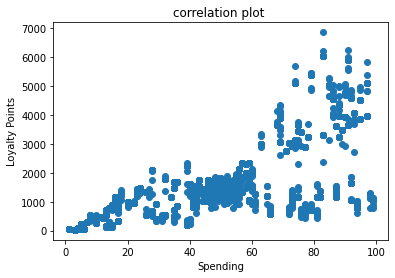

In [13]:
# Independent variable.
X=df1['ss']

# Dependent variable.
y=df1['loyalty_points']
plt.scatter(X,y)
plt.xlabel('Spending')
plt.ylabel('Loyalty Points')
plt.title('correlation plot ')
# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = df1).fit()
test.summary()


In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  


# Extract the standard errors.
  
print("Standard errors: ", test.bse)  
# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred=-75.053+33.062*df1['ss']

# View the output.
y_pred

0       1214.365
1       2602.969
2        123.319
3       2470.721
4       1247.427
          ...   
1995    2206.225
1996     189.443
1997    2933.589
1998     453.939
1999     189.443
Name: ss, Length: 2000, dtype: float64

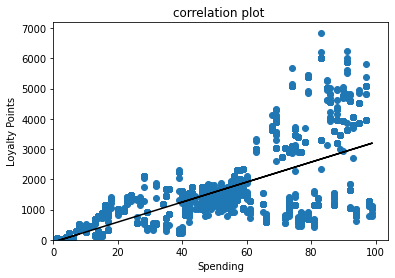

In [16]:
# Plot the graph with a regression line.
plt.scatter(X,y)
plt.plot(X,y_pred,color='black')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Spending')
plt.ylabel('Loyalty Points')
plt.title('correlation plot ')

plt.show()

### 5b) renumeration vs loyalty

In [17]:
# Independent variable.
X1=df1['ren']

# Dependent variable.
y1=df1['loyalty_points']


# OLS model and summary.
f='y1~X1'
test1=ols(f,data=df1).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        02:09:35   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X1            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())  

Parameters:  Intercept   -65.686513
X1           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X1            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [19]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred1=-65.687+34.1878*df1['ren']

# View the output.
y_pred1

0        354.822940
1        354.822940
2        382.856936
3        382.856936
4        410.890932
           ...     
1995    2821.814588
1996    3102.154548
1997    3102.154548
1998    3298.392520
1999    3102.154548
Name: ren, Length: 2000, dtype: float64

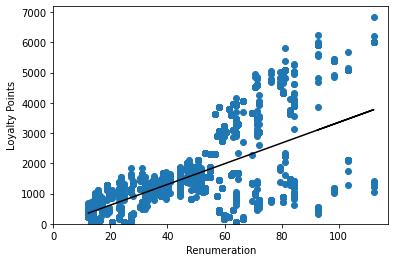

In [20]:
# Plot graph with regression line.
plt.scatter(X1,y)
plt.plot(X1,y_pred1,color='black')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Renumeration')
plt.ylabel('Loyalty Points')

plt.show()

### 5c) age vs loyalty

In [21]:
# Independent variable.
X2=df1['age']

# Dependent variable.
y2=df1['loyalty_points']

# OLS model and summary.
f='y2~X2'
test2=ols(f,data=df1).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 18 Dec 2022   Prob (F-statistic):             0.0577
Time:                        02:09:36   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X2            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())  

Parameters:  Intercept    1736.517739
X2             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X2            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
# Set the X coefficient and the constant to generate the regression table.
y2_pred=1736.5177-4.0128*df1['age']

# View the output.
y2_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

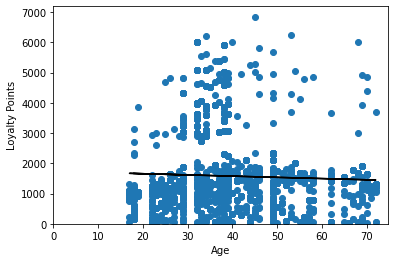

In [24]:
# Plot graph with regression line.
plt.scatter(X2,y2)
plt.plot(X2,y2_pred,color='black')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.show()

In [25]:
#Multiple linear regression
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [26]:
y3=df1['loyalty_points']
X3=df1[['ren','ss']]
#We don't include age as it has no correlation with Lp
#and thus insignificant,'product' is essentialy an index
multi = LinearRegression()  
multi.fit(X3,y3)

LinearRegression()

In [27]:
# Call the predictions for X (array).
multi.predict(X3)

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [28]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X3, y3))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X3, multi.coef_))

R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('ren', 33.97949882180282), ('ss', 32.89269468782101)]

In [29]:
# Create train and test data sets.
X_train,X_test, y_train, y_test = train_test_split(X3, y3,
                                                    test_size=0.3,
                                                    random_state=42)

In [30]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3446.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:09:37   Log-Likelihood:                -10764.
No. Observations:                1400   AIC:                         2.153e+04
Df Residuals:                    1397   BIC:                         2.155e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1697.8113     42.064    -40.363      0.0

In [31]:
print(multi.score(X_train, y_train)*100)

83.1226475988847


In [32]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [-182.63931134 3583.85990206 3041.07468344 ... 1420.73766286 1258.82699758
 1450.0332541 ]


In [34]:
# Print the R-squared value.
print(mlr.score(X_test, y_test)*100)  


81.51008929093607


In [35]:
# Check multicollinearity.
X_temp = sm.add_constant(X_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(X_temp.values,
                                               i) for i in range(X_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = X_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor features
0         8.9    const
1         1.0      ren
2         1.0       ss


In [36]:
#no multicollinearity as all values<10

In [37]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [38]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 37.13261142752897, 'LM Test p-value': 8.64481849188895e-09, 'F-stat': 19.03129335958117, 'F-test p-value': 7.004972217598982e-09}


In [39]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 425.35626224973686
Mean Square Error (Final): 299499.00922956306


## 6. Observations and insights

***Your observations here...***

We imported numpy for mathematical operations and functions.
We imported pandas for data analysis.
Matplotlib and Seaborn for data vizualization.
We also imported the 'ols' module for ols regression.
There are no missing values and we dropped the unecessary 'language'
and 'platform' columns.
We renamed the renumeration and spending score names to a simpler format.

We do not include age in our X vector of independent variables as it has no 
Correlation with the spending score. The ‘product’ column is also essentially an
Index and thus not exactly a ‘numerical’ column per say so we exclude that as well.
Our X vector now contains remuneration and spending score variables.
We create a linear regression model called multi. We fit it to the X vector data and the 
Y(spending_score) data.








# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [40]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [60]:
df2=df1[['ren','ss']]
df2.head()
df2.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ren     2000 non-null   float64
 1   ss      2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   ren             2000 non-null   float64
 3   ss              2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [61]:
# Drop unnecessary columns.


# View DataFrame.


In [62]:
# Explore the data.


In [63]:
# Descriptive statistics.
df2.describe()
df3=df2.copy()

## 2. Plot

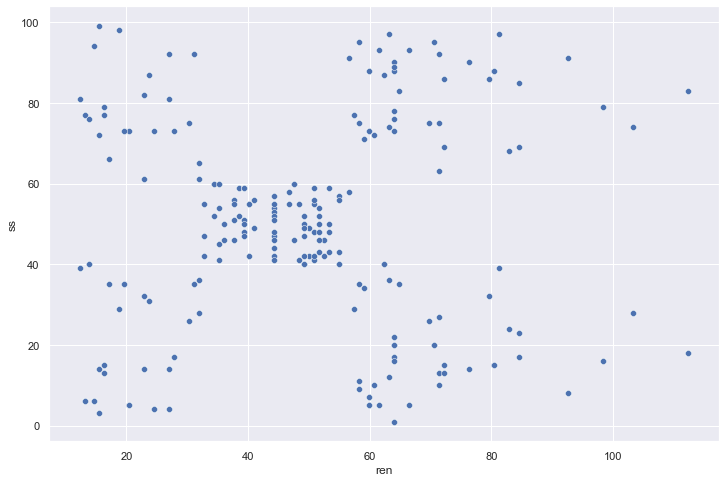

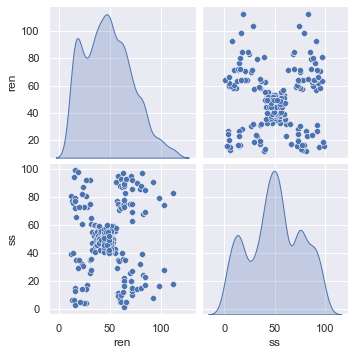

In [64]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='ren',
                y='ss',
                data=df1,)


# Create a pairplot with Seaborn.


sns.pairplot(df1,
             vars=df2,
             diag_kind= 'kde')


In [57]:
(df1['education']).value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

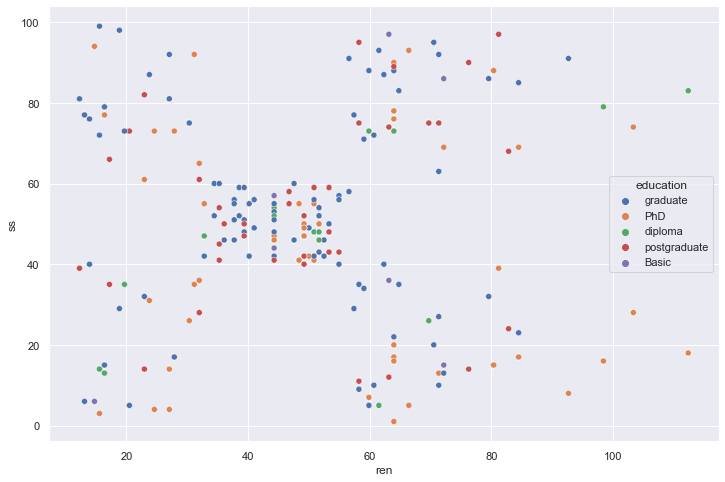

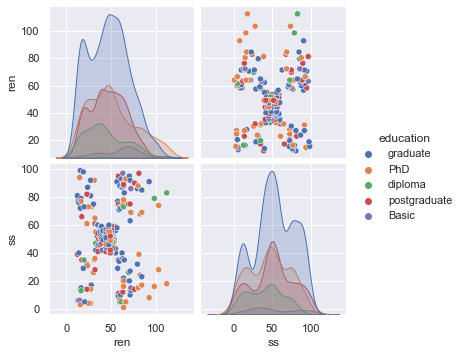

In [65]:
sns.scatterplot(x='ren',
                y='ss',
                data=df1,
               hue='education')


# Create a pairplot with Seaborn.


sns.pairplot(df1,
             vars=df2,
             diag_kind= 'kde',hue='education')


## 3. Elbow and silhoutte methods

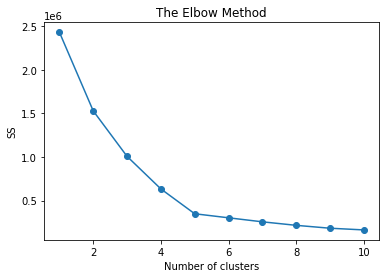

In [46]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

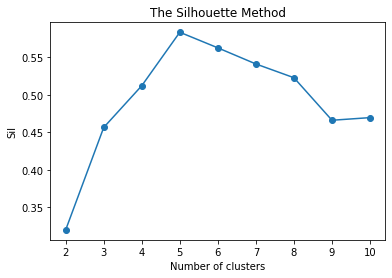

In [47]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

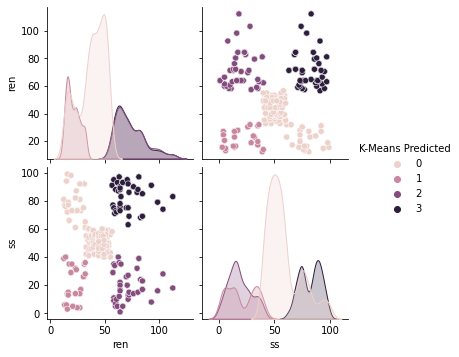

In [48]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [49]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [50]:
# View the K-Means predicted.
print(df2.head())

     ren  ss  K-Means Predicted
0  12.30  39                  1
1  12.30  81                  0
2  13.12   6                  1
3  13.12  77                  0
4  13.94  40                  1


<AxesSubplot:xlabel='ren', ylabel='ss'>

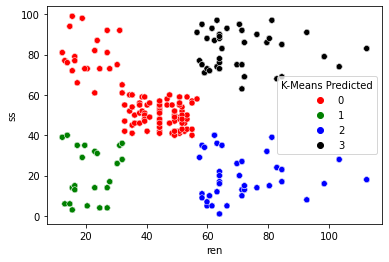

In [51]:
sns.scatterplot(x='ren' , 
                y ='ss',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

## 5. Fit final model and justify your choice

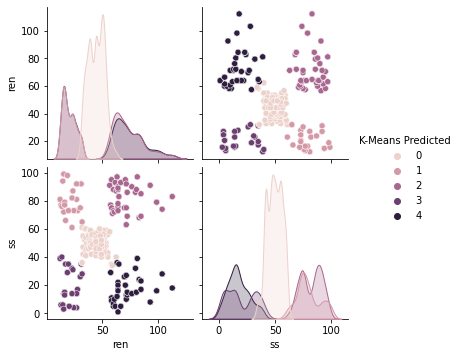

In [52]:
# Apply the final model.
# Use 5 clusters:

kmeans = KMeans(n_clusters =5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [53]:
# Check the number of observations per predicted class.
print(df2['K-Means Predicted'].value_counts())
print(df2.head())

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64
     ren  ss  K-Means Predicted
0  12.30  39                  3
1  12.30  81                  1
2  13.12   6                  3
3  13.12  77                  1
4  13.94  40                  3


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='ren', ylabel='ss'>

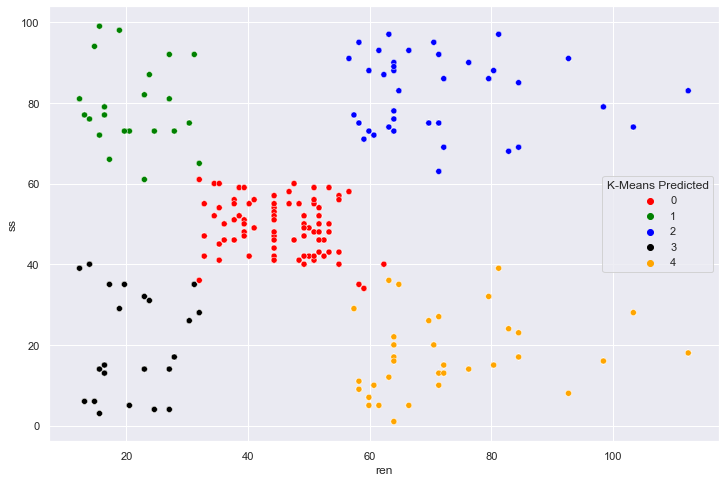

In [54]:
# Visualising the clusters.

sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='ren' , 
                y ='ss',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','orange'])
# View the DataFrame.


In [55]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***
We plot the renumeration vs spending score aswell as a pairplot to show the 
Respective distributions of the variables.
We clearly see that 5 number of clusters is the ideal number of clusters as in the elbow method
The sum of squares value does not decrease much past 5 clusters thus adding more clusters 
For such a small decrease would be unnecessary and not optimal.

For the silhouette method the peak is clearly at 5 clusters which shows the optimal value of k.
This confirms that remuneration and spending score are in fact potentially good predictors of education level and clearly not gender.

We look at the actual count of education levels:
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50

These are the results of our clustering:
0    774
2    356
4    330
3    271
1    269

Cluster 0 is clearly the graduate group as it is the largest group. It has classified it as 
774 when the true value is 900. This is easy to distinguish from the other groups.
The true lowest groups are diploma at 190 and basic at 50. From the results of our 
Clustering the two lowest groups are 3 at 271 and 1 at 269. We can probably infer these are 
The diploma and basic groups however we cannot distinguish which group is diploma and which group is basic as they are very similar. A lot of misclassification has occurred here however we can still make some useful predictions. PHD at 460 and postgraduate at 400 are the middle two true group values. Our clustering algorithm has group 2 with 356 and group 4 with 330. We can infer that these are the respective PHD and postgraduate groups. Once again a similar issue arises, as we cannot distinguish which group is PHD and which group is postgraduate. 




Overall, We can make some useful predictions using Renumeration and spending score regarding the education level of the customers. We can accurately predict if a customer is a graduate as it is clearly the largest group.  We can predict a customer as being at diploma or basic level however we cannot accurately say which of the two. We can predict a customer at being at PHD and postgraduate level but once again cannot accurately say which of the two. This indicates that PHD and postgraduate students have similar patterns of remuneration and spending scores and basic and diploma level students also have similar patterns of remuneration and spending scores.







# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [136]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [137]:
# Load the data set as df3.
df3=pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [138]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [139]:
df3.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [140]:
# Keep necessary columns. Drop unnecessary columns.
df4=df3[['review','summary']]

# View DataFrame.
df4.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [141]:
# Determine if there are any missing values.
print(df4.isna().sum)
print(df4.isnull().sum)
#No missing values

<bound method NDFrame._add_numeric_operations.<locals>.sum of       review  summary
0      False    False
1      False    False
2      False    False
3      False    False
4      False    False
...      ...      ...
1995   False    False
1996   False    False
1997   False    False
1998   False    False
1999   False    False

[2000 rows x 2 columns]>
<bound method NDFrame._add_numeric_operations.<locals>.sum of       review  summary
0      False    False
1      False    False
2      False    False
3      False    False
4      False    False
...      ...      ...
1995   False    False
1996   False    False
1997   False    False
1998   False    False
1999   False    False

[2000 rows x 2 columns]>


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [142]:
# Review: Change all to lower case and join with a space.
df4['review']=df4['review'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [143]:
# Summary: Change all to lower case and join with a space.
df4['summary']=df4['summary'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df4.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [144]:
# Replace all the punctuations in review column.

df4['review'] = df4['review'].str.replace('[^\w\s]','')

# View output.
df4['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [145]:
# Replace all the puncuations in summary column.

df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# View output.
df4['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [146]:
# Drop duplicates in both columns.
print(df4.duplicated().sum())
df5=df4.drop_duplicates()
# View DataFrame.


39


In [147]:
df5.duplicated().sum()

0

In [148]:
df5.reset_index(inplace=True)
df5.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [149]:
df5.shape

(1961, 3)

## 3. Tokenise and create wordclouds

In [150]:
# Create new DataFrame (copy DataFrame).
df6=df5.copy()
# View DataFrame.
df6.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [151]:
# Apply tokenisation to both columns.
df6['revtoken']=df6['review'].apply(word_tokenize)
df6['sumtoken']=df6['summary'].apply(word_tokenize)
# View DataFrame.
df6.head()

,index,review,summary,revtoken,sumtoken
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [152]:
# Review: Create a word cloud.

all_revtokens=[]
for i in range(df6.shape[0]):
    all_revtokens=all_revtokens + df6['revtoken'][i]
all_revtokens_string=' '
for i in all_revtokens:
    all_revtokens_string=all_revtokens_string + i + ' '
    

In [153]:
wordcloudrev = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_revtokens_string)


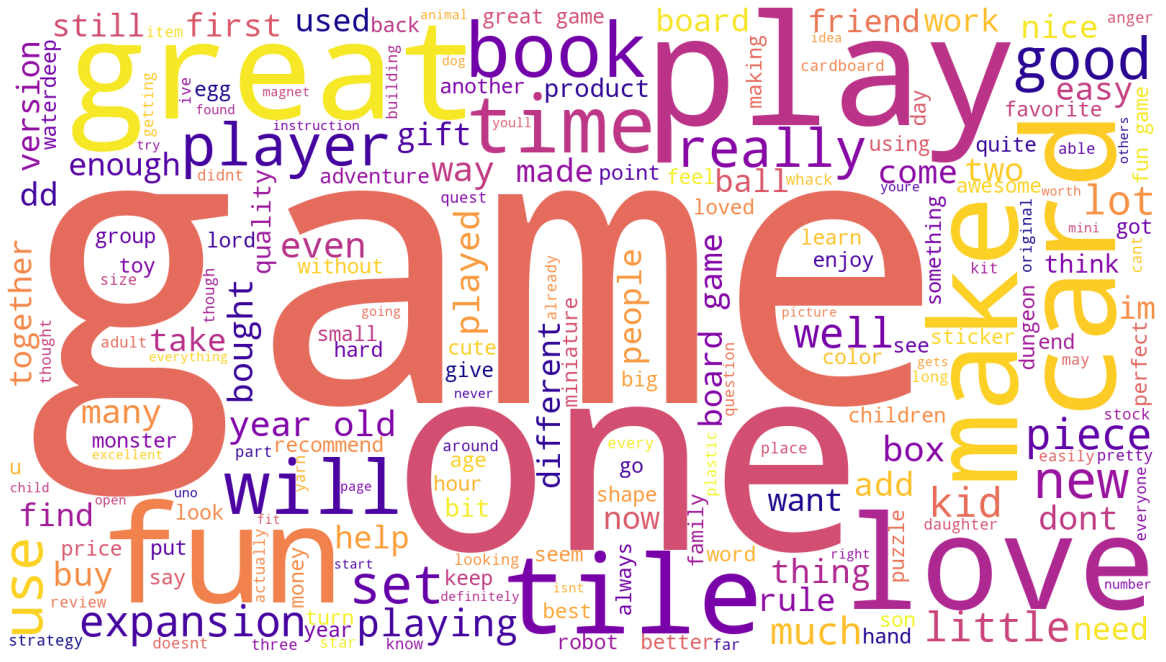

In [154]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloudrev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


In [155]:
# Summary: Create a word cloud.
all_sumtokens=[]
for i in range(df6.shape[0]):
    all_sumtokens=all_sumtokens + df6['sumtoken'][i]
all_sumtokens_string=' '
for i in all_sumtokens:
    all_sumtokens_string=all_sumtokens_string + i + ' '
    
wordcloudsum = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_sumtokens_string)
   

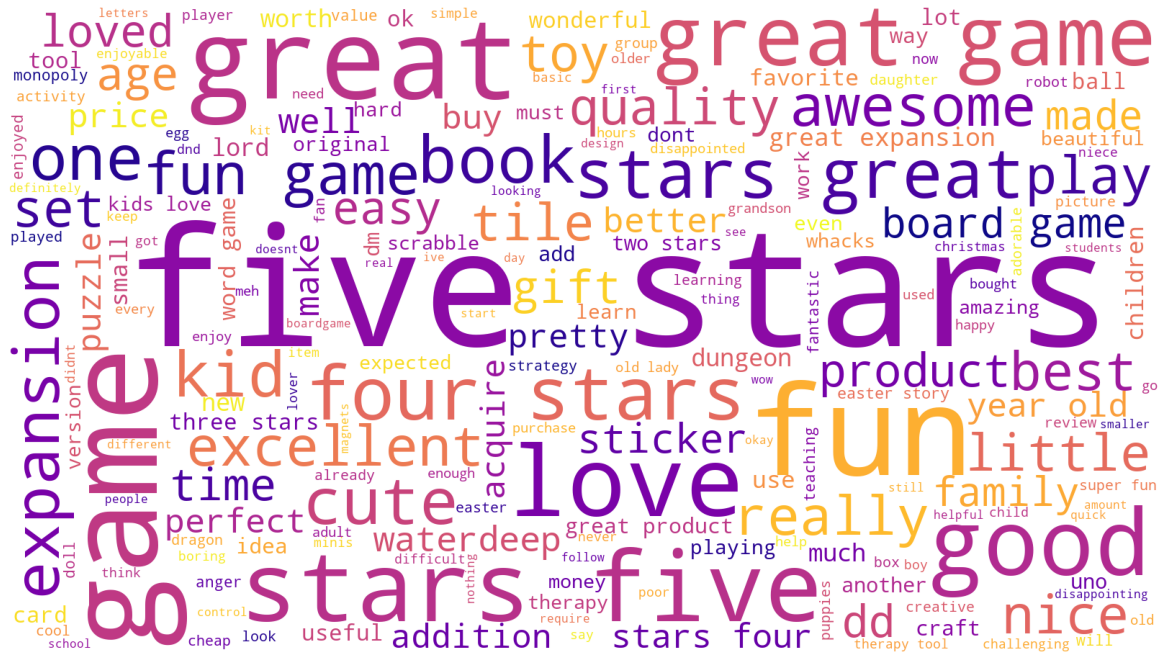

In [156]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloudsum) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [157]:
# Determine the frequency distribution.
fdistrev=FreqDist(all_revtokens)
fdistrev

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [158]:
fdistsum=FreqDist(all_sumtokens)
fdistsum

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [159]:
# Delete all the alpanum.
revtokens2=[word for word in all_revtokens if word.isalnum()]

In [160]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))

revtokens3=[i for i in revtokens2 if i.lower() not in english_stopwords]
revtokens3_string=''
for z in revtokens3:
    revtokens3_string=revtokens3_string + z + ' '

In [161]:
sumtoken2=[word for word in all_sumtokens if word.isalnum()]


In [162]:
sumtokens3=[i for i in sumtoken2 if i.lower() not in english_stopwords]
sumtokens3_string=''
for m in sumtokens3:
    sumtokens3_string=sumtokens3_string + m + ' '

### 4c) Create wordcloud without stopwords

In [163]:
# Create a wordcloud without stop words.
wordcloudsum1 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(sumtokens3_string)
wordcloudrev1=wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(revtokens3_string) 



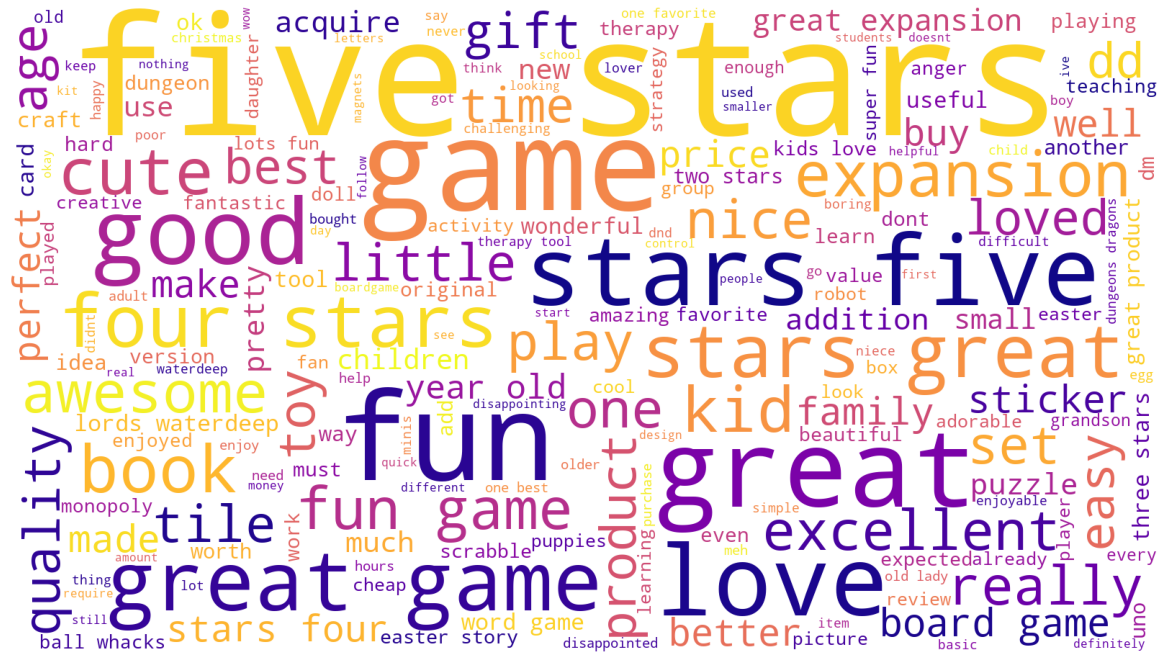

In [164]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloudsum1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

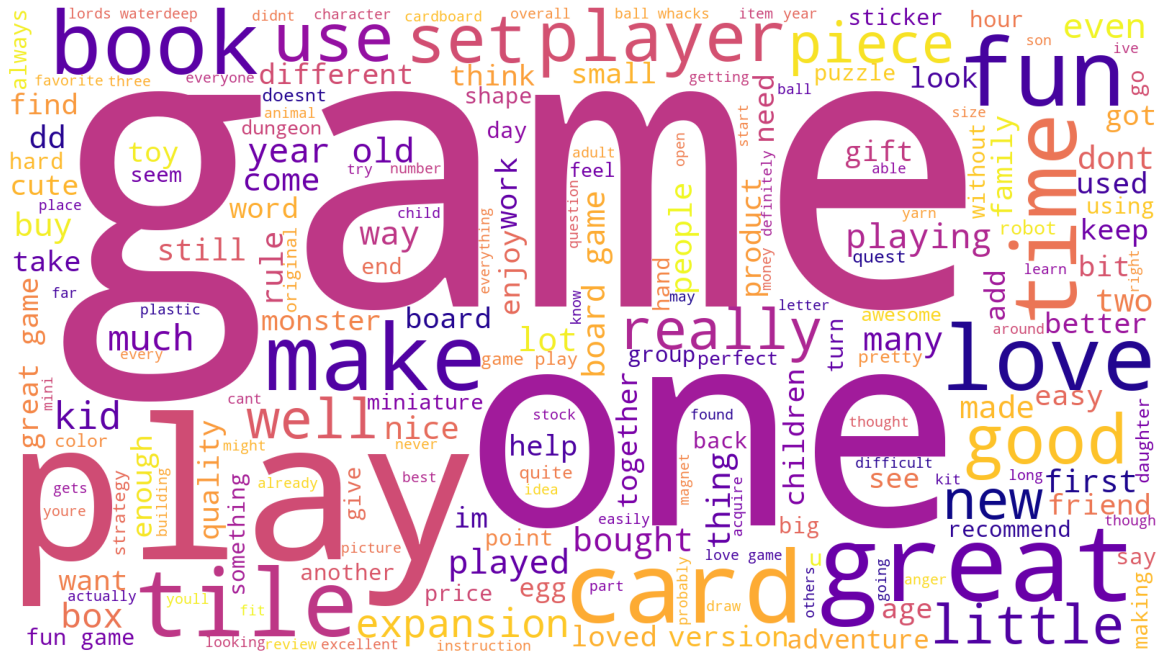

In [165]:
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloudrev1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [166]:
# Determine the 15 most common words.
fdistrev1=FreqDist(revtokens3)
fdistrev1

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [167]:
fdistsum1=FreqDist(sumtokens3)
fdistsum1

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [168]:

from collections import Counter


countsrev = pd.DataFrame(Counter(revtokens3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
countsrev

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [169]:

from collections import Counter

sumcounts = pd.DataFrame(Counter(sumtokens3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sumcounts

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


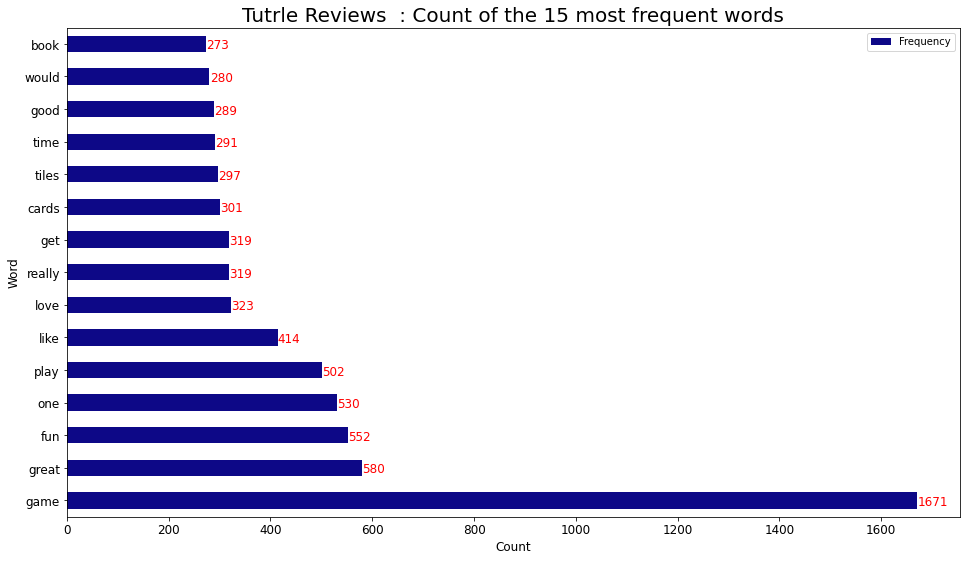

In [174]:
# Set the plot type.
ax = countsrev.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Tutrle Reviews  : Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

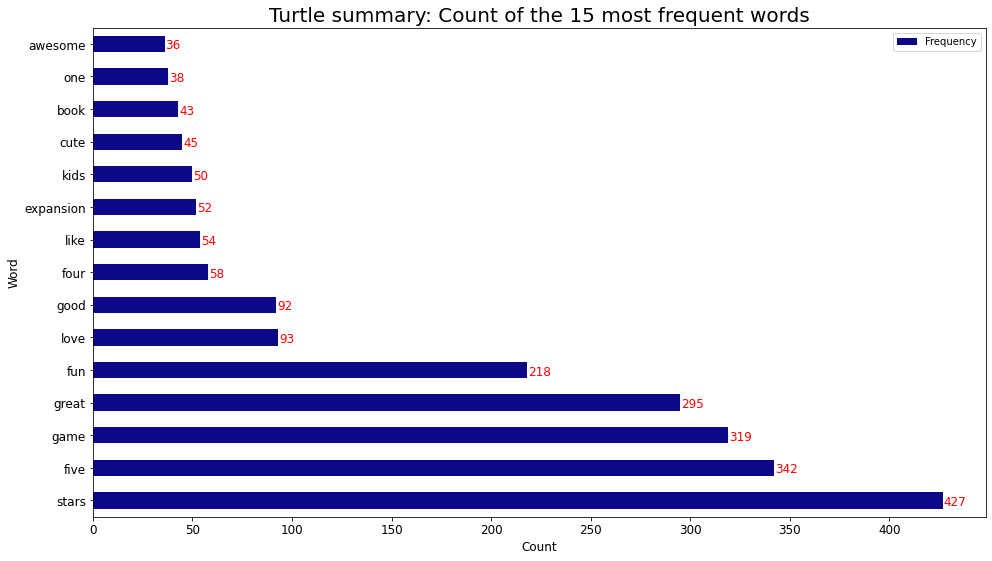

In [175]:
# Set the plot type.
ax = sumcounts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [176]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [180]:
# Determine polarity of both columns. 

df6['review polarity']=df6['review'].apply(generate_polarity)
df6['summary polarity']=df6['summary'].apply(generate_polarity)
# View output.
df6['review polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review polarity, dtype: float64

In [181]:
df6['summary polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary polarity, dtype: float64

In [183]:
#define subjectivity
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

df6['review subjectivity']=df6['review'].apply(generate_subjectivity)

df6['review subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review subjectivity, dtype: float64

In [184]:
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

df6['summary subjectivity']=df6['summary'].apply(generate_subjectivity)

df6['summary subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary subjectivity, dtype: float64

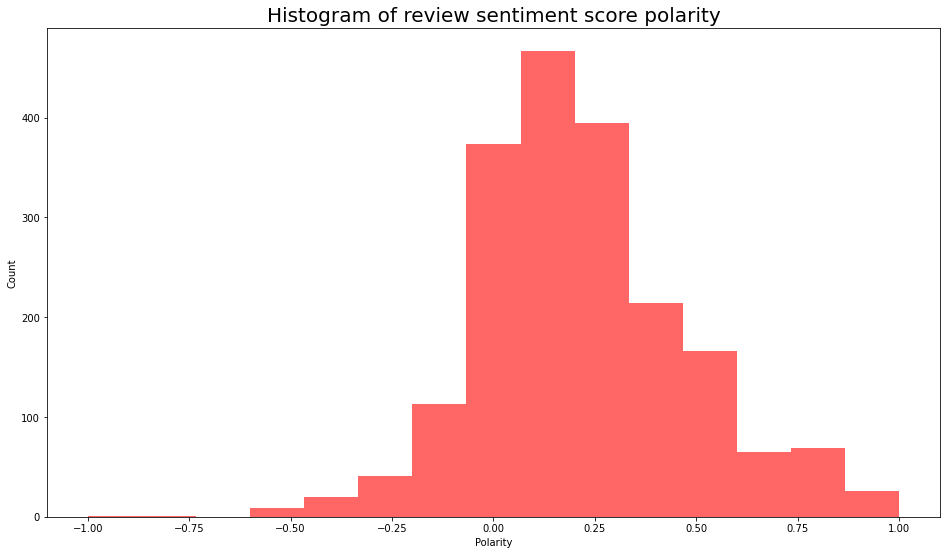

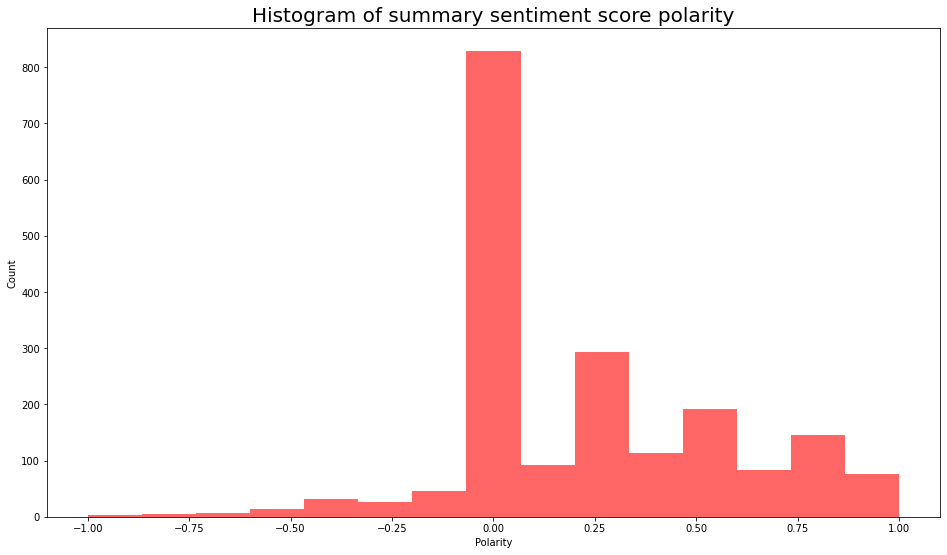

In [188]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins=15

plt.figure(figsize=(16,9))

n,bins,patches =plt.hist(df6['review polarity'],num_bins,facecolor='red',alpha=0.6)


plt.xlabel('Polarity')
plt.ylabel('Count')

plt.title('Histogram of review sentiment score polarity',fontsize=20)

plt.show()

# Histogram of sentiment score
num_bins=15

plt.figure(figsize=(16,9))

n,bins,patches =plt.hist(df6['summary polarity'],num_bins,facecolor='red',alpha=0.6)


plt.xlabel('Polarity')
plt.ylabel('Count')

plt.title('Histogram of summary sentiment score polarity',fontsize=20)

plt.show()

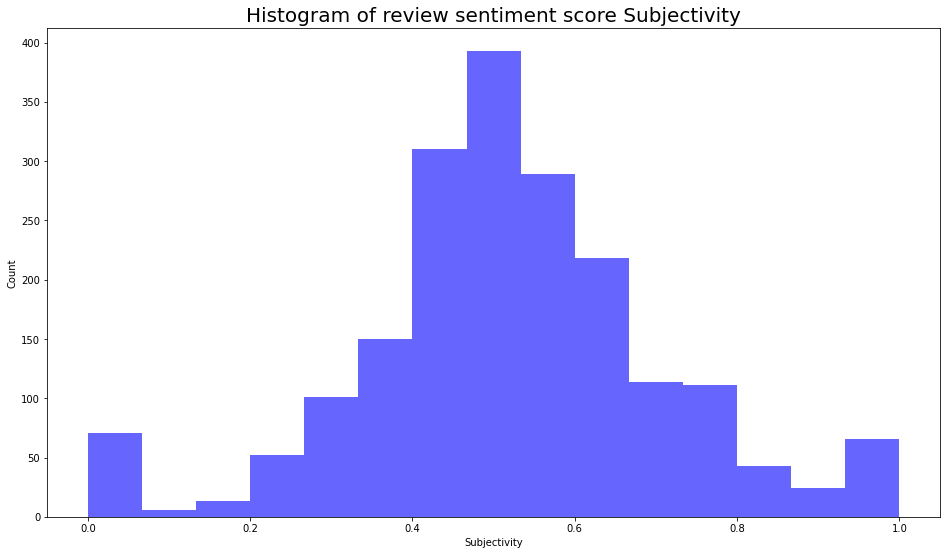

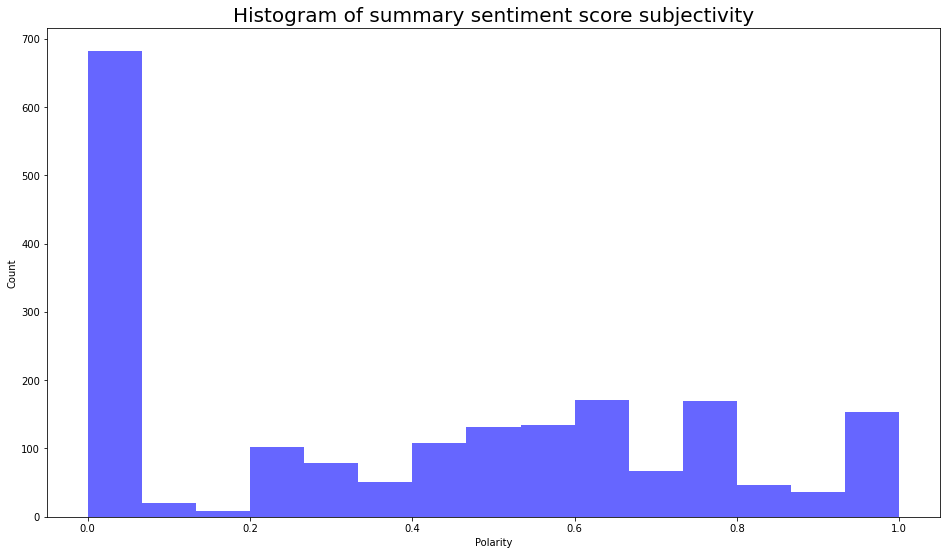

In [192]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins=15

plt.figure(figsize=(16,9))

n,bins,patches =plt.hist(df6['review subjectivity'],num_bins,facecolor='blue',alpha=0.6)


plt.xlabel('Subjectivity')
plt.ylabel('Count')

plt.title('Histogram of review sentiment score Subjectivity',fontsize=20)

plt.show()

# Histogram of sentiment score
num_bins=15

plt.figure(figsize=(16,9))

n,bins,patches =plt.hist(df6['summary subjectivity'],num_bins,facecolor='blue',alpha=0.6)


plt.xlabel('Polarity')
plt.ylabel('Count')

plt.title('Histogram of summary sentiment score subjectivity',fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [209]:
# Top 20 negative reviews.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()
rev_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df6['revtoken']}

# View output.
rev_polarity1 = pd.DataFrame(rev_polarity).T
revneg20=rev_polarity1['compound'].sort_values(ascending=True)
revneg20.head(20)

here is my review crossposted from boardgamegeekcom i have fond memories of dd from my youth that i occasionally attempt to recapture i remember the sense of vague foreboding conjured by rpglike board games such as runequest and spacehulk i had read some favorable reviews of the new rpgasboardgame series promoted by wizards on the coast and i was excited to try this i splunked down my hardearned cash and amazon duly delivered a hefty box of dreams to my doorstep wrath of ashardalon and i had some good times initially my friends and i gamely punched all the cardboard pieces out of the sprues we love punching pieces out of sprues it inspires a sense of childlike wonder and anticipation in us this tile has a horrid chamber on it that dungeon tile has dead bodies ooh i wonder what a flaming sphere does these cards all have various powers and spells on them look you can play a dragon character and the plastic figurines were enjoyable similar to those plastic dinosaurs we all had as kids whe

In [206]:
# Top 20 negative summaries.

sum_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df6['sumtoken']}

# View output.
sum_polarity1 = pd.DataFrame(sum_polarity).T
sumneg20=sum_polarity1['compound'].sort_values(ascending=True)
sumneg20.head(20)

# View output.


a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting   -0.9052
the tardis the doctor river song amy rory fight every enemy in cards                                             -0.7269
no 20 sided die                                                                                                  -0.7269
defective poor qc                                                                                                -0.7184
then you will find this board game to be dumb and boring                                                         -0.6808
before this i hated running any rpg campaign dealing with towns because it                                       -0.6369
but it gets repetitive and the students start to get bored after about half a round                              -0.6310
worst quality adult board game ive even seen                                                                     -0.6249
adds a needed amount of tension 

In [211]:
# Top 20 positive reviews.
revtop20=rev_polarity1['compound'].sort_values(ascending=False)
revtop20.head(20)

# View output.


disclaimer bought this from a local store paid list value but supporting local game stores helps keep them in business and its a rough market to keep a gaming store running also i do not own nor have i playednbspa datahookproductlinklinked classalinknormal hrefdungeonsdragonscastleravenloftboardgamedp0786955570refcm_cr_arp_d_rvw_txtieutf8dungeons dragons castle ravenloft board gamea the first dd adventures board game regardless dungeons dragons wrath of ashardalon board game woa is a fantastic value at 65 list you get 42 plastic unpainted minis 1 scale you get a nice set of cardboard interlocking dungeon tiles and you get a fun very random board game playable either by yourself or with up to 4 friends what it is woa is in gamer terms a roguelike in tabletop form in laymans terms woa is a dungeon crawler you start at the entrance and have a specific goal rescue the villagers survive the dungeon destroy the altar slay the dragon the adventures are built randomly based on shuffling the ti

In [212]:
# Top 20 positive summaries.

sumpos20=sum_polarity1['compound'].sort_values(ascending=False)
sumpos20.head(20)



wow what a great set of tiles for such a great price a great starter set                         0.9524
wrath of ashardalon great investment for an avid rpg fan who enjoys tabletop as well as crpgs    0.9186
great for playing great for creative workshops too                                               0.9169
easy to learn great fun to play                                                                  0.9136
loves stickers and she loves peppa so this was perfect                                           0.9074
great quality very cute and perfect for my toddler                                               0.9073
but the kids really like it and helps start good discussion                                      0.8988
great game value for the price is great also                                                     0.8910
great game great value                                                                           0.8910
i wish all those who buy better luck fairly easy to understand a

## 7. Discuss: Insights and observations

***Your observations here...***

We import pandas, numpy and matplotlib as usual. We also import the nltk package.
We import WordCloud as well as various nltk modules such as the word tokenizers and text blob.

The only columns we need to keep are the review and summary columns thus we create a new dataframe to store these columns. There are no missing values.
We need to now prepare the data for NLP. We use lambda functions to change both columns 
To lower case and join the elements in each of the columns. This ensures all the text is in the same 
Format allowing for more efficient application of NLP. We also remove all the punctuation.
There are 39 duplicates in both the columns, we thus drop these.
There are 1961 rows and two columns (review and summary) excluding the index.
We apply the word tokenizer to both the columns to tokenize the reviews and summaries.
We now use a for loop to create an initial wordcloud to visualize the frequency of terms in the text.

We create a dataframe using the Counter module to get the frequency of the 15
Most common words, the most common word is the word ‘game’ with 1671 instances,
‘Great’ is second with 580 instances fun is third with 552 instances. ‘Love’ and ‘like’
Also are in this list. The word game does not indicate much as it is a games company.
However the appearance of positive words frequently as listed above furthur supports.Our initial observation that the polarity is positive.
For the summaries we see the words ‘awesome’,’like’,’fun’ and ‘great’ are in the most 
Frequent list indicating an overall positive sentiment.




The given function calculates the polarity with the first index( 0) of the
TextBlob.sentiment function. The second index(1) gives the subjectivity score.

The review sentiment score subjectivity interestingly follows a somewhat normal 
distribution , with the peak/mode at 0 implying that the majority of reviews contained
Factual information rather than personal opinion.
The summary subjectivity distribution is heavily right skewed with the majority of
Scores at 0 once again implying mostle factual information.



The review sentiment score polarity seems slightly left skewed with the majority of scores
Greater than 0 implying the majority of reviews were positive or neutral.

The summary sentiment score polarity has a peak/mode at 0, some smaller peaks greater than 0
And very few frequencies less than 0. This implies the summaries are mostly neutral with some positive summaries and very little negative summaries.

In our Jupyter notebook we listed the top 20 negative summaries and reviews and 
The top 20 positive summaries and reviews. Let us look at some of the polarity scores and use inspection and logic to see if it corresponds to the sentiment of the text.



# 